# <span style='color:#FE774C'>OceanLab </span> Example Notebook

#### We recommend duplicating this notebook if you want to make changes to the code or run additional analyses
To do that simply right click on the file on the left panel and select "duplicate"

Youll need to pip install a few packages for some analyses

In [36]:
%pip install windrose openpyxl
%conda install -c conda-forge iris

In [3]:
import odp.geospatial as odp
import warnings
import geopandas as gpd
import pandas as pd


import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as md
import dateutil
from scipy.stats import zscore
import numpy as np


import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cmocean

import matplotlib.cm as cm
from math import pi
import iris
import iris.coord_categorisation
import iris.quickplot as qplt

from windrose import WindroseAxes

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)


In [4]:
db=odp.Database()
db_plt= odp.PlotTools()
gd=odp.GridData()

#### The following shows the available datasets that can be used as dataframes. To see gridded datasets, run *gd.datasets_table* instead. 
#### Alternatively check out the data catalog in the [Ocean Data Explorer Catalog](https://app.oceandata.earth/catalog)

In [5]:
db.datasets

,provider_acronym,database_description,table_description,homepage,citation,subject,tags,units
name,,,,,,,,
World Ocean Database Casts,"[NOAA, NCEI]",The World Ocean Database (WOD) is world's larg...,Dataset of the casts of the World Ocean Databa...,https://www.ncei.noaa.gov/products/world-ocean...,"Boyer, T.P., O.K. Baranova, C. Coleman, H.E. G...",global ocean variables,"[temperature, salinity, oxygen, nutrients, pre...",temperature ...
World Ocean Database Measurements,"[NOAA, NCEI]",The World Ocean Database (WOD) is world's larg...,Dataset of measurements taken from all the cas...,https://www.ncei.noaa.gov/products/world-ocean...,"Boyer, T.P., O.K. Baranova, C. Coleman, H.E. G...",global ocean variables,"[temperature, salinity, oxygen, nutrients, pre...",temperature ...
Marine Regions - IHO Sea Areas,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,None,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, iho sea, region]",None
Marine Regions - Intersect EEZ IHO Sea,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,The intersect of the Exclusive Economic Zones ...,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, iho sea, region, eez]",None
Marine Regions - World EEZ,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,Maritime Boundaries and Exclusive Economic Zon...,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, world, region, eez]",None
Marine Regions - World Marine Heritage Sites,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,World Marine Heritage Sites version 1,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, world marine heritage sites, reg...",None
Marine Regions - EEZ Land Union,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,The union of world country boundaries and EEZ's,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, region, eez]",None
Ocean Biodiversity Information System,[OBIS],Most comprehensive gateway to the world’s ocea...,None,https://obis.org/,OBIS (YEAR) Ocean Biodiversity Information Sys...,global ocean biodiversity,"[biodiversity, species, taxa, ocean]",None
World Register of Marine Species,[WoRMS],Authoritative and comprehensive list of names ...,None,https://www.marinespecies.org/index.php,WoRMS Editorial Board (2022). World Register o...,authoritative list of marine species,"[marine species, biodiversity, register]",None


#### <span style='color:#3464eb'>To search for datasets with specific tags you can run:<span>

In [7]:
df_db = db.datasets
df_db[['wind' in x for x in df_db['tags']]]

,provider_acronym,database_description,table_description,homepage,citation,subject,tags,units
name,,,,,,,,
OceanLab - Munkholmen buoy,[SINTEF],Weather and ocean data provided from the munkh...,Weather and ocean data provided from the munkh...,https://oceanlabobservatory.no/,"Data provided by SINTEF OceanLab Observatoy, T...","ocean variables,weather","[air temperature, wind, pressure, humidity]",temperature celsius pressure ...


#### <span style='color:#3464eb'>You can also access citation information etc.

In [8]:
db.datasets.loc['OceanLab - Munkholmen buoy'].citation

'Data provided by SINTEF OceanLab Observatoy, Trondheim, Norway, oceanlabobservatory.no, [date obtained]'

In [9]:
db.datasets.loc['OceanLab - Munkholmen buoy'].database_description

'Weather and ocean data provided from the munkholmen buoy as part of the OceanLab initiative in Trondheim, Norway. '

## Part 1: Pulling data - <span style='color:#FE774C'> **OceanLab**  </span>


#### Insert the name of the table you are interested in into the query function
In this case we are interseted in the OceanLab data between specific dates <br>
This returns a [geopandas](https://geopandas.org/en/stable/docs.html) dataframe with a geometry column<br>
There are many built-in functions you can use with these geopandas dataframes

In [12]:
df = db.query('OceanLab - Munkholmen buoy',
             date_from="2022-01-27",
             date_to="2022-02-28")
df.head(3)

,timestamp,geometry,humidity,pressure,temperature,wind_direction,wind_speed
0,2022-01-27 06:41:01,POINT (10.37226 63.45750),90.0,987.3,2.9,62.0,4.76
1,2022-01-27 06:42:00,POINT (10.37226 63.45750),90.0,987.3,2.8,66.0,4.01
2,2022-01-27 06:43:01,POINT (10.37225 63.45750),91.0,987.3,2.9,63.0,4.60


A step needed to clean the data

In [19]:
df = df[~df.eq(-7999).any(1)]

In [20]:
df['day'] = df["timestamp"].dt.date

### We can also add <span style='color:#9D59F4'> filters </span> to the data pull

You can filter for a specific value in a column, or a specific geographical area

In [21]:
filter1 = db.filter_data('wind_speed', '>', '10')
df_wind = db.query('OceanLab - Munkholmen buoy', 
                     filters=[filter1],
                     limit = 5)
df_wind.head(3)

,timestamp,geometry,humidity,pressure,temperature,wind_direction,wind_speed
0,2022-01-27 20:02:00,POINT (10.37231 63.45748),59.0,1005.5,4.2,334.0,10.86
1,2022-01-27 20:08:01,POINT (10.37232 63.45747),67.0,1005.7,4.2,312.0,11.47
2,2022-01-27 20:09:01,POINT (10.37233 63.45746),57.0,1005.6,4.1,304.0,11.64


## Let's create some plots to explore the data

#### Temperature data

In [22]:
df_temp = df[['timestamp', 'day','temperature']]

In [23]:
df_temp.head()

,timestamp,day,temperature
0,2022-01-27 06:41:01,2022-01-27,2.9
1,2022-01-27 06:42:00,2022-01-27,2.8
2,2022-01-27 06:43:01,2022-01-27,2.9
3,2022-01-27 06:44:01,2022-01-27,2.8
4,2022-01-27 06:45:01,2022-01-27,2.9


In [24]:
df_plot = df_temp.groupby('day').agg({'temperature': ['mean', 'min', 'max']}).reset_index()
df_plot.head()

day temperature          
                     mean  min  max
0  2022-01-27    3.566129  0.8  5.0
1  2022-01-28    2.544228  0.8  4.4
2  2022-01-29    3.616122  1.5  6.7
3  2022-01-30    1.974722 -0.4  4.7
4  2022-01-31   -1.582743 -3.1  0.0

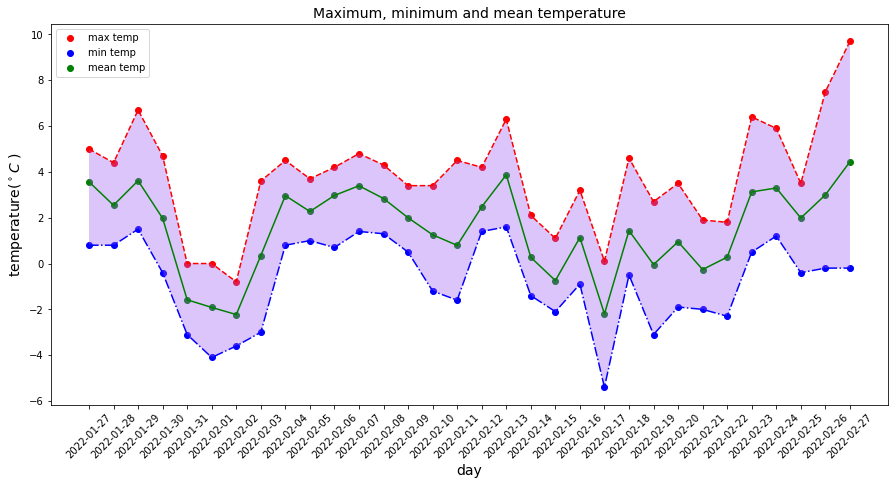

In [25]:
plt.figure(figsize=(15,7))
plt.plot(df_plot['day'],df_plot['temperature']['max'], '--r')
plt.plot(df_plot['day'],df_plot['temperature']['min'], '-.b')
plt.plot(df_plot['day'],df_plot['temperature']['mean'], 'g')
plt.scatter(df_plot['day'],df_plot['temperature']['max'],c='r',label='max temp')
plt.scatter(df_plot['day'],df_plot['temperature']['min'],c='b',label='min temp')
plt.scatter(df_plot['day'],df_plot['temperature']['mean'],c='g',label='mean temp')

plt.xlabel('day',size=14)
plt.ylabel('temperature($^\circ C$ )',size=14)
plt.xticks(rotation = 45)
plt.xticks(df_plot['day'])
ax=plt.gca()
# ax.axis([0,11,-40,40])
plt.gca().fill_between(df_plot['day'], 
                       df_plot['temperature']['max'], df_plot['temperature']['min'], 
                       facecolor='#9D59F4', 
                       alpha=0.35)
plt.title('Maximum, minimum and mean temperature',size=14)
plt.legend(loc=0)

plt.show()

#### Wind data

In [27]:
df_wind = df[['timestamp', 'day','wind_speed', 'wind_direction']]

<AxesSubplot:xlabel='wind_speed_x', ylabel='wind_speed_y'>

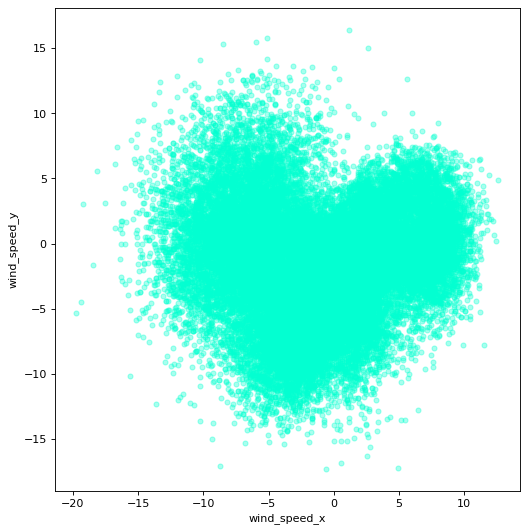

In [28]:
df_wind['wind_speed_x'] = df_wind['wind_speed'] * np.sin(df_wind['wind_direction'] * pi / 180.0)
df_wind['wind_speed_y'] = df_wind['wind_speed'] * np.cos(df_wind['wind_direction'] * pi / 180.0)
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect('equal')
df_wind.plot(kind='scatter', x='wind_speed_x', y='wind_speed_y', alpha=0.35, ax=ax, color='#03FFD1')


<AxesSubplot:>

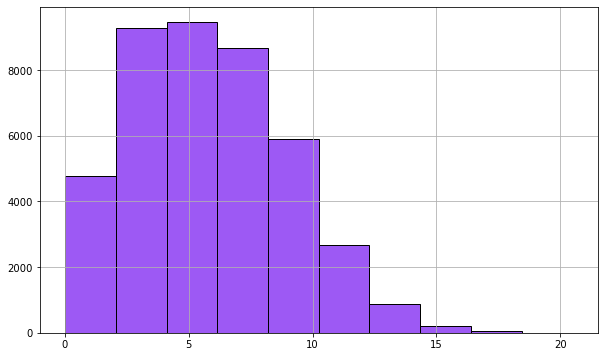

In [29]:
df_wind['wind_speed'].hist(figsize=(10,6), color='#9D59F4', edgecolor='black')

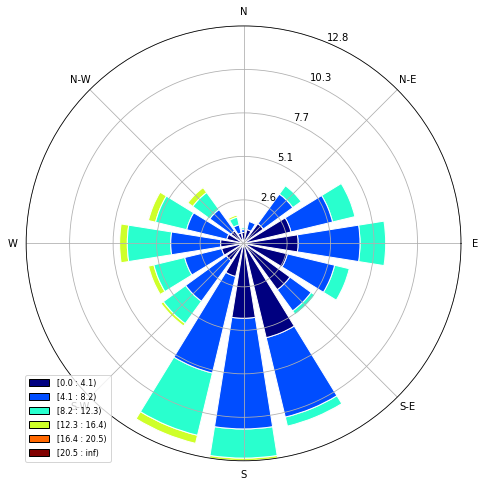

In [30]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='windrose')
ax.bar(df_wind.wind_direction, df_wind.wind_speed, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()

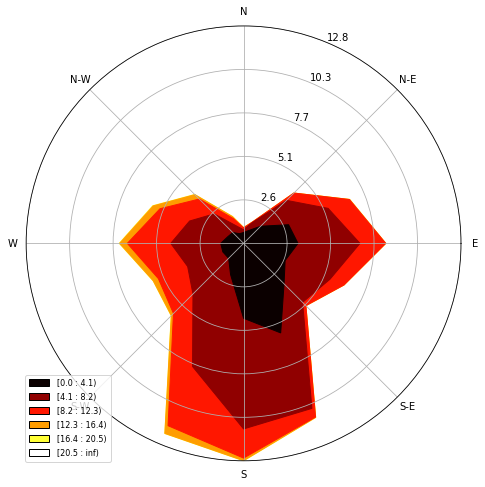

In [31]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='windrose')
ax.contourf(df_wind.wind_direction, df_wind.wind_speed, normed=True, cmap=cm.hot)
ax.set_legend()
plt.show()

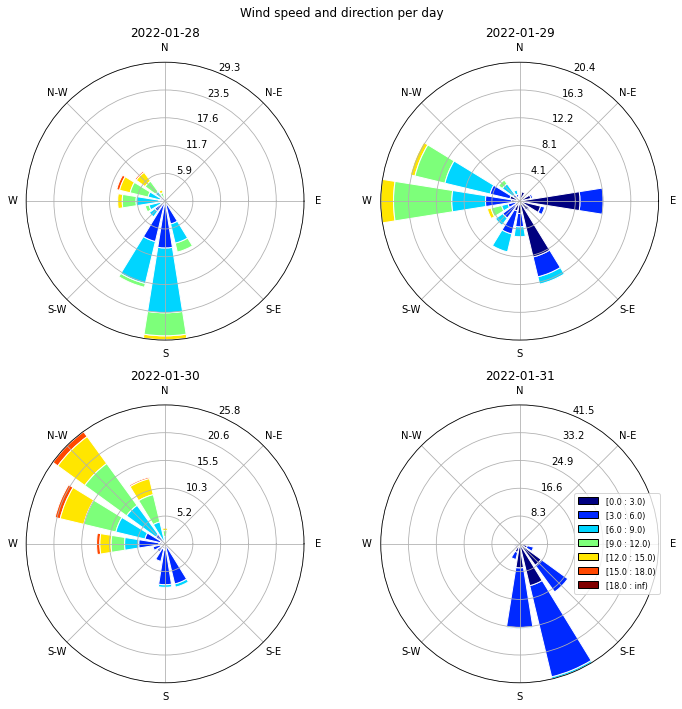

In [32]:
fig = plt.figure(figsize=(10,10))
bins = np.arange(0.01, 20, 3)
df_wind_test = df_wind[(df_wind.day >= pd.to_datetime('2022-01-28')) & (df_wind.day < pd.to_datetime('2022-02-01'))].sort_values('day')
fig.suptitle("Wind speed and direction per day")
for i, day in zip(range((len((df_wind_test['day']).unique()))), df_wind_test['day'].unique()):
    ax = fig.add_subplot(2, 2, i+1, projection='windrose')
    title = day
    ax.set_title(title)
    df_plot = df_wind_test[df_wind_test.day == day]

    direction = df_plot['wind_direction']
    var = df_plot['wind_speed']
    ax.bar(direction, var, normed=True, opening=0.8, bins=bins, edgecolor='white')
    
fig.tight_layout()
ax.set_legend(loc='right')
plt.show()